# Coffee Derivatives Pricing: A Step-by-Step Guide

Welcome to this introductory guide on pricing coffee derivatives using Python! We'll walk through three fundamental financial models:

1. **Cost of Carry Model** - Calculates the futures price of coffee.
2. **Black-Scholes Model** - Prices a call option on a futures contract.
3. **Monte Carlo Simulations** - Forecasts possible future price paths.

This guide is perfect for beginners looking to understand the basics of financial modeling. Let's dive in!

## 1. Cost of Carry Model

The **Cost of Carry Model** helps calculate the theoretical price of a futures contract.  
It factors in the spot price, risk-free rate, and storage costs over the time to maturity.

### Formula:
$$
F_t = S_t \cdot e^{(r + d)T}
$$

Where:  
- $F_t$: Futures price  
- $S_t$: Spot price  
- $r$: Risk-free rate  
- $d$: Storage cost (percentage of spot price)  
- $T$: Time to maturity (in years)  

### Steps:
1. **Gather Data**:  
   - **Spot Price** ($S_t$): Current market price of coffee.  
   - **Risk-Free Rate** ($r$): Use the 6-month US Treasury yield.  
   - **Storage Cost** ($d$): Percentage of the spot price.  
   - **Time to Maturity** ($T$): For 6 months, $T = 0.5$.  

2. **Implement the Formula**: Plug in the data and compute $F_t$.

In [1]:
import numpy as np

# Inputs
S_t = 1.20  # Spot price in dollars
r = 0.02    # Risk-free rate (2%)
d = 0.01    # Storage cost (1%)
T = 0.5     # Time to maturity (6 months)

# Calculate futures price
F_t = S_t * np.exp((r + d) * T)

# Output
print(f"The fair price of the coffee futures contract is ${F_t:.3f} per pound.")

The fair price of the coffee futures contract is $1.218 per pound.


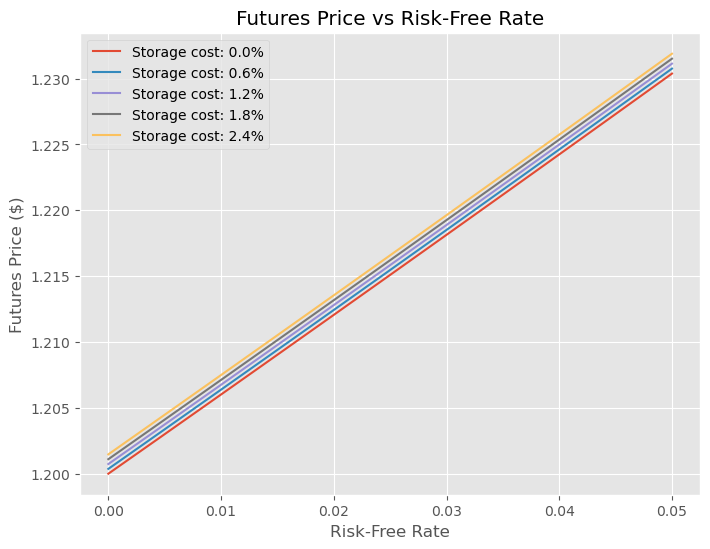

In [2]:
# To better understand how the futures price evolves with changes in the risk-free rate and storage costs, we'll plot F_t against these variables.

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Vary risk-free rate and storage cost
risk_free_rates = np.linspace(0, 0.05, 50)  # 0% to 5%
storage_costs = np.linspace(0, 0.03, 50)    # 0% to 3%

# Calculate futures prices
futures_prices = np.array([[S_t * np.exp((r + d) * T) 
                            for r in risk_free_rates] for d in storage_costs])

# Plot
plt.figure(figsize=(8, 6))
for i, d in enumerate(storage_costs[::10]):  # Sample some storage costs
    plt.plot(risk_free_rates, futures_prices[i], label=f"Storage cost: {d:.1%}")

plt.title("Futures Price vs Risk-Free Rate")
plt.xlabel("Risk-Free Rate")
plt.ylabel("Futures Price ($)")
plt.legend()
plt.show()

## 2. Black-Scholes Model

The **Black-Scholes Model** calculates the price of a European call option on a futures contract.

### Formula:
$$
C = S_0 \cdot N(d_1) - X \cdot e^{-rT} \cdot N(d_2)
$$

Where:  
- $C$: Call option price  
- $S_0$: Spot price  
- $X$: Strike price  
- $T$: Time to maturity  
- $r$: Risk-free rate  
- $N(\cdot)$: Cumulative distribution function of the standard normal distribution  
- $d_1, d_2$: Intermediate calculations defined as:
$$
d_1 = \frac{\ln(S_0/X) + (r + \sigma^2 / 2)T}{\sigma \sqrt{T}}, \quad d_2 = d_1 - \sigma \sqrt{T}
$$

### Steps:
1. **Gather Data**:  
   - Spot price ($S_0$): Market price of coffee.  
   - Strike price ($X$): Price at which the option can be exercised.  
   - Risk-free rate ($r$): Annualized yield on a risk-free bond.  
   - Time to maturity ($T$): Contract duration in years.  
   - Volatility ($\sigma$): Annualized standard deviation of coffee prices.

2. **Implement the Formula**: Calculate $d_1$, $d_2$, and $C$.


In [3]:
from scipy.stats import norm

# Inputs
S_0 = 1.20  # Spot price in dollars
X = 1.25    # Strike price in dollars
r = 0.02    # Risk-free rate (2%)
T = 0.5     # Time to maturity (6 months)
sigma = 0.25  # Volatility (25%)

# Calculate d1 and d2
d1 = (np.log(S_0 / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate call option price
C = S_0 * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)

# Output
print(f"The price of the call option is ${C:.3f}.")

The price of the call option is $0.068.


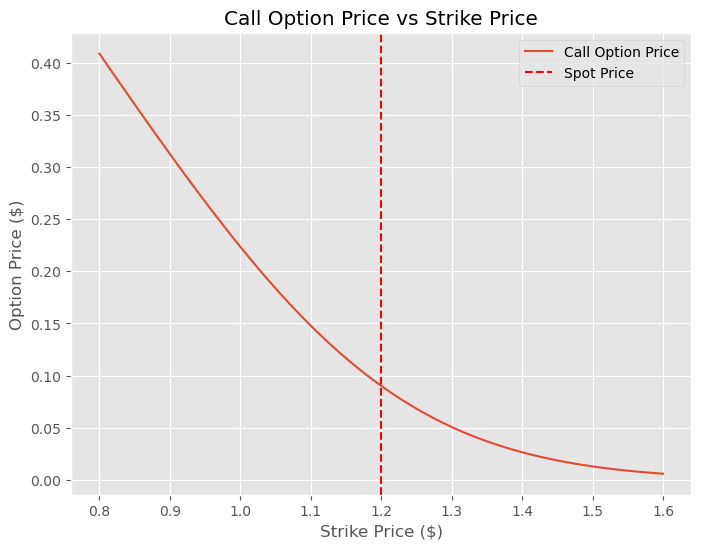

In [4]:
# Here, we’ll plot the option price as a function of the strike price to understand how C changes with different strike prices, highlighting the in-the-money and out-of-the-money relationships.

# Strike prices
strike_prices = np.linspace(0.80, 1.60, 100)

# Calculate call option prices
option_prices = []
for X in strike_prices:
    d1 = (np.log(S_0 / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    C = S_0 * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    option_prices.append(C)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(strike_prices, option_prices, label="Call Option Price")
plt.title("Call Option Price vs Strike Price")
plt.xlabel("Strike Price ($)")
plt.ylabel("Option Price ($)")
plt.axvline(S_0, color='red', linestyle='--', label="Spot Price")
plt.legend()
plt.show()


## 3. Monte Carlo Simulations

Monte Carlo simulations model possible price paths using Geometric Brownian Motion (GBM).

### Steps:
1. **Define Parameters**:
   - Initial price ($S_0$), risk-free rate ($r$), volatility ($\sigma$), and time period ($T$).
2. **Simulate Paths**:
   - Generate $N$ paths using stochastic processes.
3. **Analyze Results**:
   - Compute the average simulated price.

In [5]:
# Parameters
S_0 = 1.20  # Spot price in dollars
r = 0.02    # Risk-free rate (2%)
sigma = 0.25  # Volatility (25%)
T = 0.5      # Time to maturity (6 months)
num_simulations = 10000
num_steps = 252  # Daily steps

# Time increment
dt = T / num_steps

# Simulate price paths
np.random.seed(42)  # Reproducibility
price_paths = np.zeros((num_steps, num_simulations))
price_paths[0] = S_0

for t in range(1, num_steps):
    z = np.random.standard_normal(num_simulations)
    price_paths[t] = price_paths[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

# Average price at maturity
average_price = np.mean(price_paths[-1])

# Output
print(f"The average simulated price of the coffee futures contract at maturity is ${average_price:.3f}.")

The average simulated price of the coffee futures contract at maturity is $1.210.


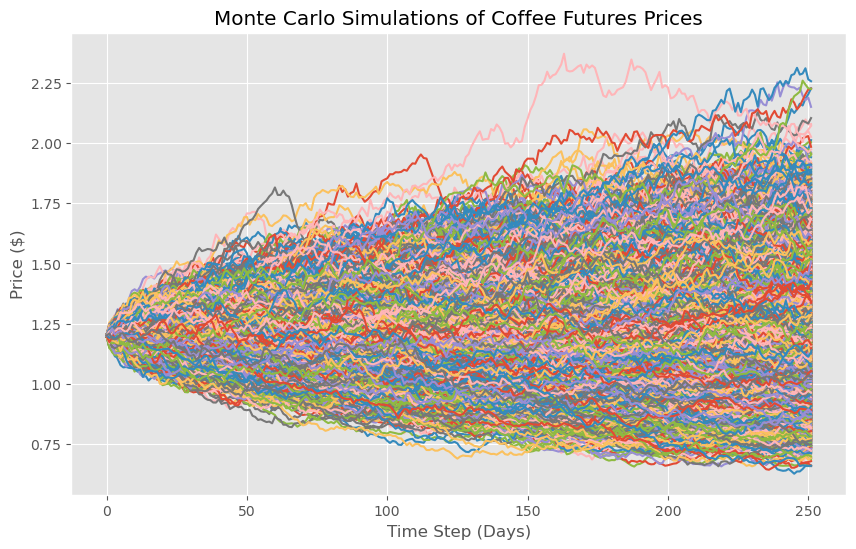

In [6]:
# To visualize the stochastic nature of simulated price paths, we’ll plot several paths generated by the Monte Carlo simulation.

# Plot
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(price_paths[:, i])

plt.title("Monte Carlo Simulations of Coffee Futures Prices")
plt.xlabel("Time Step (Days)")
plt.ylabel("Price ($)")
plt.show()

## Real-World Considerations

While this guide covers foundational models for pricing coffee derivatives, applying them to real-world markets requires addressing specific complexities inherent to agricultural commodities. Key considerations include:

### 1. Market Liquidity  
The liquidity of coffee derivatives markets (and similar commodities) depends on:  
- **Seasonality**: Trading volumes often increase around harvest seasons or major supply chain announcements.  
- **Contract Specifications**: Standardized exchange-traded contracts (e.g., ICE coffee futures) are generally more liquid than Over-The-Counter (OTC) contracts.  
- **Regional Variations**: Liquidity can vary significantly across regional contracts (e.g., Arabica vs. Robusta coffee).  

For less liquid contracts, bid-ask spreads may be wider, making accurate pricing and execution challenging.

### 2. Transaction Costs in Commodity Markets  
Costs in coffee and similar commodities go beyond theoretical pricing:  
- **Warehousing and Storage Fees**: Unlike financial assets, physical commodities incur costs for storage, spoilage, and quality maintenance, which are proportional to the spot price.  
- **Transportation Costs**: Freight, shipping delays, or logistical disruptions (e.g., port closures) can influence derivative prices.  
- **Hedging Costs**: Producers and traders often use futures/options for hedging, and associated costs may indirectly impact derivative prices.  

### 3. Fundamental Drivers of Commodity Prices  
Coffee derivatives are heavily influenced by supply-demand dynamics, particularly:  
- **Weather Impacts**: Coffee is highly weather-sensitive. Events like droughts in Brazil (the largest Arabica producer) or floods in Vietnam (a major Robusta producer) can drastically alter futures prices.  
- **Harvest Cycles and Seasonality**: Coffee production cycles introduce predictable patterns in supply, but actual harvest outcomes depend on real-time conditions, causing deviations in prices.  
- **Pests and Disease**: Issues like coffee rust (Hemileia vastatrix) can severely reduce yields, driving price volatility.  

For cocoa, sugar, and other commodities, similar factors like rainfall, frost, or disease outbreaks play pivotal roles in pricing.  

### 4. Advanced Pricing Models for Commodities  
The basic models in this guide assume constant parameters, which often fail in volatile markets like coffee. Real-world applications may require:  
- **Mean-Reverting Models**: Commodity prices often revert to a long-term mean (e.g., Ornstein-Uhlenbeck process) due to cyclical supply-demand dynamics.  
- **Storage Models**: Incorporate inventory levels as a key variable, where high stocks suppress prices and low stocks amplify them.  
- **Weather-Based Models**: Use weather data (rainfall, temperature) to predict price changes, especially for crops with known sensitivities.  

For example, the **Schwartz-Smith two-factor model** is widely used for commodities, incorporating short-term shocks and long-term trends.  

### 5. Volatility and Risk Factors  
Volatility in coffee prices often exceeds that of other assets, driven by:  
- **Geopolitical Events**: Civil unrest or labor disputes in key producing countries like Colombia or Ethiopia can disrupt supply.  
- **Currency Risk**: Coffee prices are typically quoted in USD, but production costs are incurred in local currencies. Fluctuations in the Brazilian real or Vietnamese dong impact global prices.  
- **Unexpected Demand Shocks**: Sudden increases in demand from large importing countries like the US or EU can lead to significant price jumps.  

Volatility modeling for coffee and similar commodities may require techniques like **GARCH** (Generalized Autoregressive Conditional Heteroskedasticity) or stochastic volatility models to better reflect real-world price behavior.

### 6. Role of Speculators and Arbitrage  
- **Speculation**: Coffee futures markets often attract speculators who may amplify price movements based on macroeconomic or technical factors.  
- **Arbitrage Opportunities**: Price discrepancies between spot and futures markets or among regional contracts (e.g., Arabica vs. Robusta) create arbitrage opportunities, but these are often short-lived in efficient markets.  

### 7. Impact of Regulations and Trade Policies  
- **Import/Export Controls**: Countries may impose tariffs, quotas, or bans on coffee exports during shortages, significantly affecting global derivative prices.  
- **Sustainability Requirements**: Increasing demand for ethically sourced coffee (e.g., fair trade certification) adds complexity to pricing models by introducing new cost structures.  

### 8. Technology in Commodity Derivatives Pricing  
Modern tools specific to agricultural commodity pricing include:  
- **Weather Forecast Models**: Integration of satellite data and predictive analytics to model future supply conditions.  
- **IoT and Blockchain**: Real-time tracking of coffee shipments or warehouse inventory improves data accuracy and transparency.  
- **AI for Demand Forecasting**: Machine learning models to predict consumer demand based on trends, economic conditions, and consumption data.  

## Final Note  

This guide is designed for beginners to understand how coffee derivatives are priced, but real-world applications require careful consideration of the factors outlined above.  
- For coffee, cocoa, and sugar derivatives, modeling efforts must be tailored to account for weather sensitivity, storage dynamics, and geopolitical risks.  
- Advanced tools like mean-reverting processes, stochastic volatility models, and real-time data integration can significantly enhance accuracy.  

## Next Steps:  
To deepen your knowledge:  
- Explore **Schwartz-Smith models** and **GARCH volatility modeling**.  
- Learn about **supply chain analytics** to understand commodity flows better.  
- Use libraries like `quantlib` and APIs like Bloomberg or Refinitiv for real-time data.  

Remember, pricing coffee derivatives is as much an art as a science. Building a solid foundation with these methods is the first step toward mastering this complex but fascinating domain!